# **Day - 39 : Analyze, Transform, and Shift Data.**

*1.*

*Import the cars_and_career dataset using CSV. Using pandas describe method, what is the mean age of the age column?* 

In [1]:
import pandas as pd

df = pd.read_csv("Data/cars_and_careers.CSV")
df.head()

,Name,Occupation,Age,Car
0,John,ENGINEER,32,Toyota Camry
1,Emily,TEACHER,28,Honda Civic
2,Michael,DOCTOR,45,Ford Mustang
3,Emma,LAWYER,37,BMW 3 Series
4,David,ARTIST,41,Mercedes-Benz C-Class


In [2]:
age_mean = df["Age"].describe()["mean"]
print('The mean age is', age_mean)

The mean age is 34.75


*2.*

*Using the pandas transform() function, convert the items in the "cars" column into propercase(only first letter must be capitalized) letters.* 

In [3]:
df_copy = df.copy()

df_copy["Occupation"] = df_copy["Occupation"].transform(lambda x: x.capitalize())
df_copy.head()

,Name,Occupation,Age,Car
0,John,Engineer,32,Toyota Camry
1,Emily,Teacher,28,Honda Civic
2,Michael,Doctor,45,Ford Mustang
3,Emma,Lawyer,37,BMW 3 Series
4,David,Artist,41,Mercedes-Benz C-Class


*3.*

*You have come across some new information that must be added to your DataFrame. Using pandas shift() and iloc methods(), insert a row into your DataFrame. This row will sit at index 0. The row is: ["Casy","ford", 31]. The last row ["Grace", "Actor", 29, "Ford Explorer"] must be removed.* 

In [4]:
df1 = df_copy.shift(periods=1, axis = "rows")

df1.iloc[0] = ["Casy","Dancer", 31, "Tesla"]
df1.head()

,Name,Occupation,Age,Car
0,Casy,Dancer,31.0,Tesla
1,John,Engineer,32.0,Toyota Camry
2,Emily,Teacher,28.0,Honda Civic
3,Michael,Doctor,45.0,Ford Mustang
4,Emma,Lawyer,37.0,BMW 3 Series


*4.*

*Using the pandas.str.find() method, write a code to confirm if the name "Grace" has been removed from the DataFrame.* 

In [5]:
is_grace_present = not (df1['Name'].str.find('Grace').sum() == -len(df1))
is_grace_present

False

*5.*

*What car does a person by the name of 'Emily' drives? and what is her occupation?* 

In [6]:
emily_index = df1.index[df1["Name"]=="Emily"].tolist()

emily_car = df1.loc[emily_index, "Car"]
emily_occupation = df1.loc[emily_index, "Occupation"]
print(f'Emily drives a: {str(emily_car.tolist()[0])}')
print(f"Emily's occupation is: {emily_occupation.tolist()[0]}")

Emily drives a: Honda Civic
Emily's occupation is: Teacher


*6.*

*Which car is driven by the oldest person? Using Matplotlib, plot a bar plot of the cars drive by the 5 oldest people and their age in descending order.* 

In [7]:
oldest_person_index = df1['Age'].idxmax()

name_car = df1.loc[oldest_person_index, "Car"]

print(f'The oldest person drives a {name_car}')

The oldest person drives a Ford Mustang


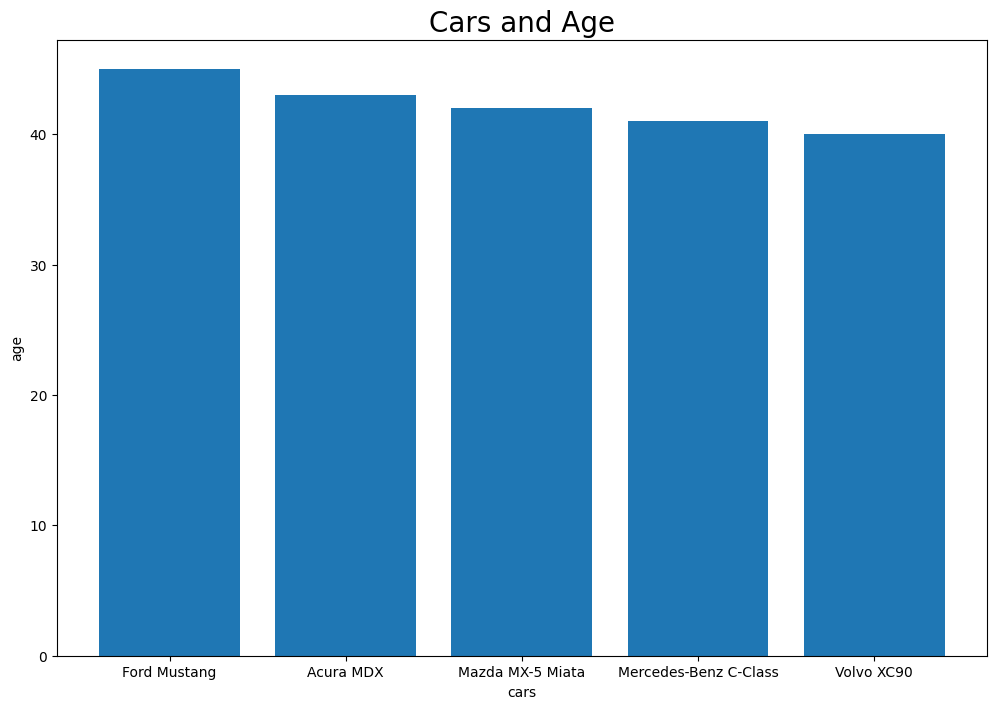

In [8]:
import matplotlib.pyplot as plt


df1_sorted = df1.sort_values(by="Age", ascending=False).head()

cars = df1_sorted["Car"]

age = df1_sorted["Age"]

plt.figure(figsize=(12, 8))
plt.bar(cars, age)

plt.xlabel("cars")
plt.ylabel("age")
plt.title("Cars and Age", fontsize=20)
plt.show()

*7.*

*For data to be used in machine learning algorithms, it must be converted to a numerical format. This is because machine learning algorithms can only understand numbers. Your task now is to write a code that will convert the columns into numeric data types for machine learning using first pandas and then Sklearn.* 

In [9]:
df_modified = pd.get_dummies(df1, columns=["Name", "Occupation", "Car"], dtype=int)
df_modified

,Age,Name_Alexander,Name_Amelia,Name_Andrew,Name_Ava,Name_Benjamin,Name_Casy,Name_Charlotte,Name_Daniel,Name_David,...,Car_Lexus RX,Car_Mazda MX-5 Miata,Car_Mercedes-Benz C-Class,Car_Nissan Sentra,Car_Subaru Outback,Car_Tesla,Car_Tesla Model S,Car_Toyota Camry,Car_Volkswagen Golf,Car_Volvo XC90
0,31.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,35.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,29.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,33.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,39.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [10]:
df_modified.shape[1]

61

In [11]:
from sklearn.preprocessing import LabelEncoder

cars = LabelEncoder()
names = LabelEncoder()
occupation = LabelEncoder()


df1["Car"] = cars.fit_transform(df["Car"])
df1["Name"] = names.fit_transform(df["Name"])
df1["Occupation"] = names.fit_transform(df["Occupation"])
df1.head()

,Name,Occupation,Age,Car
0,13,8,31.0,17
1,8,18,32.0,7
2,16,7,28.0,5
3,9,11,45.0,2
4,7,3,37.0,13
